# KMeans

In KMeans the algorithm groups data points into a specified number of clusters, where each data point belongs to the cluster with the nearest mean. Based on the distance, each data points each data points are assigned to the closest centroid. For each cluster there is a centroid which is calculated by the mean of data points. Certain number of iterations are repeated to find the final optimal centroid

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

df = sns.load_dataset("iris")

In [2]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
features = df.drop(columns="species")
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features_scaled = sc.fit_transform(features)

In [5]:
inertia = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\imash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\imash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\imash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\imash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [6]:
inertia

[599.9999999999999,
 222.36170496502297,
 140.0820210962166,
 114.55684421262913,
 91.64526530586978,
 81.78700057341548,
 75.26141522650065,
 64.70135086658499,
 55.82348932753156,
 52.07923432560123]

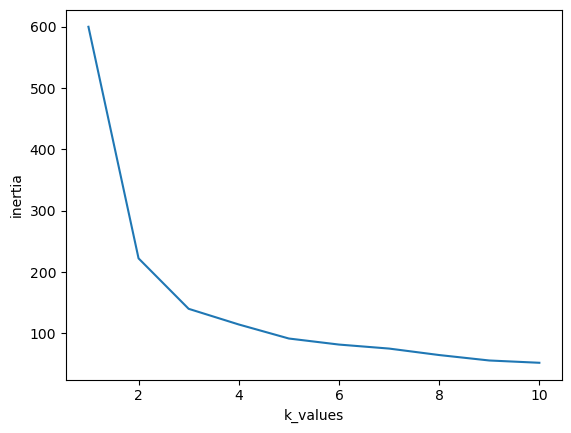

In [7]:
import matplotlib.pyplot as plt
plt.plot(k_values, inertia)
plt.xlabel("k_values")
plt.ylabel("inertia")

plt.show()

cluster = 3

In [8]:
kmeans = KMeans(n_clusters=3)
features["cluster"] = kmeans.fit_predict(features_scaled)
features

C:\Users\imash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


<Axes: xlabel='sepal_length', ylabel='petal_width'>

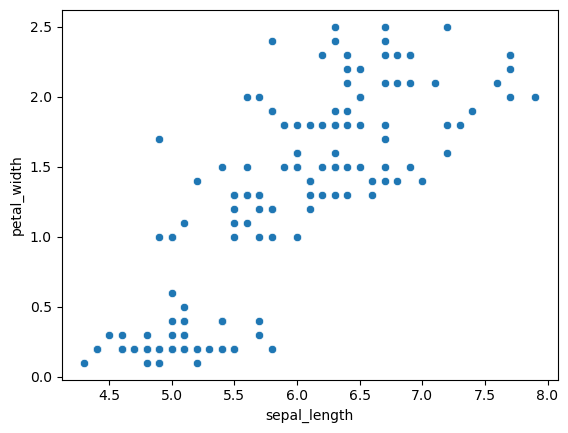

In [11]:
sns.scatterplot(x=features["sepal_length"], y=features["petal_width"])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

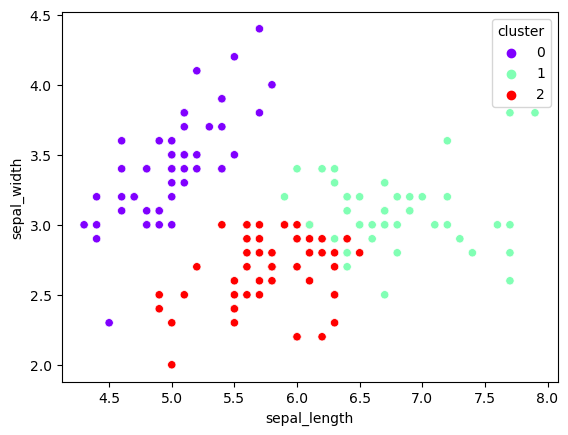

In [13]:
sns.scatterplot(x=features["sepal_length"], y=features["sepal_width"], hue=features["cluster"], palette="rainbow")

In [14]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(features_scaled,kmeans.labels_)

0.45937792074496625

KMeans is suitable for Iris dataset because the classes are naturally grouped as it is related to plants and easier for the KMeans to identify. Also the Iris data set is small and KMeans works well in low dimensional features.

# Hierarchical Clustering

It builds a hierarchy of clusters in the form of a tree-like structure called a dendrogram. Based on a distance metric the two closest clusters are merged and this process continues until all the are in a singlr cluster.

In [26]:
df = sns.load_dataset("iris")
features = df.drop(columns="species")
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
features["cluster"] = hc.fit_predict(features_scaled)
features

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


<Axes: xlabel='sepal_length', ylabel='petal_length'>

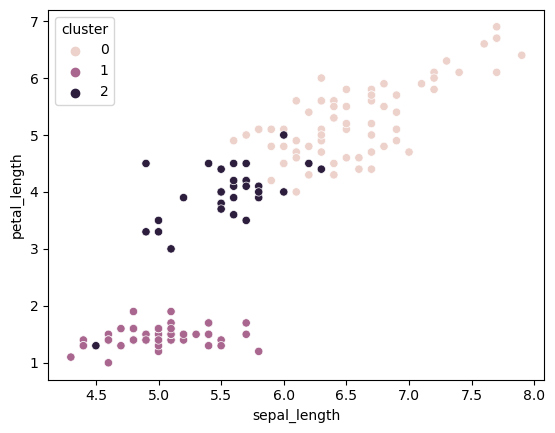

In [30]:
import seaborn as sns
sns.scatterplot(x=features["sepal_length"],y=features["petal_length"],hue=features["cluster"])

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
z= linkage(features_scaled, method="ward")

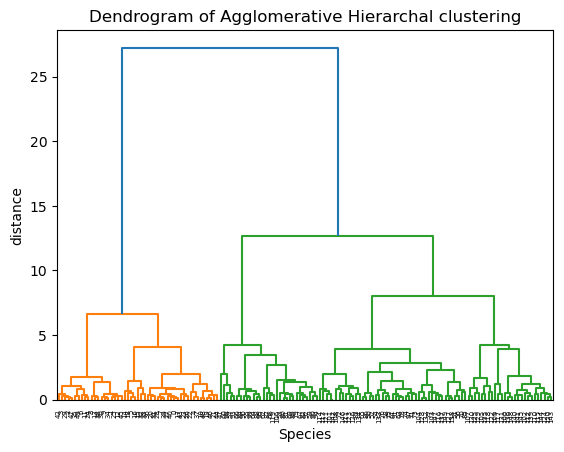

In [36]:
dendrogram(z,leaf_rotation=90)
plt.title("Dendrogram of Agglomerative Hierarchal clustering")
plt.xlabel("Species")
plt.ylabel("distance")
plt.show()

In [37]:
silhouette_score(features_scaled,features["cluster"])

0.446689041028591

In Hierarchal clustering we get a visual representation of how data points are clustered with the help of dendrogram. We dont have to specify how many clusters are there initially. Here also Iris data is small and low dimensional which is optimal for hierarchal clustering. Natural grouping can be identified easily by Hierarchal clustering therefore Iris data is handled much easily.